<a href="https://colab.research.google.com/github/uzairafnan007/Assignment/blob/main/ML-B736.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.00


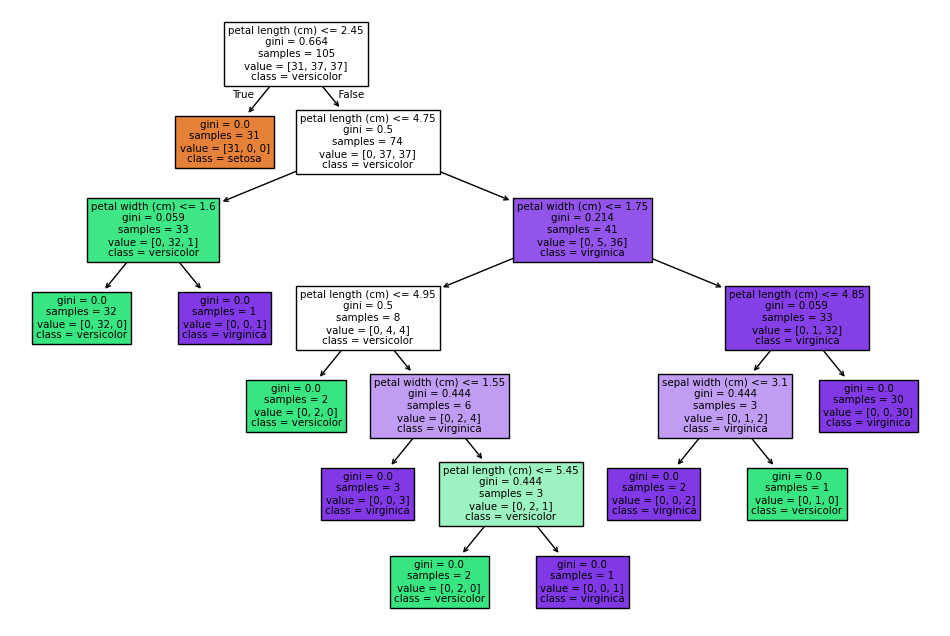

In [1]:
##1. Descion-tree
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


3.0 4.2
[-2.0, -1.0, 0.0, 1.0, 2.0] [-2.0, 0.0, 1.0, 3.0, 4.0]
0.8660254037844386
1.5 -0.2999999999999998


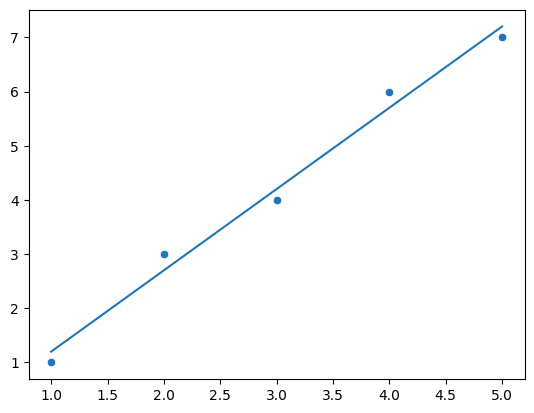

In [11]:
###2. Linear Regression
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

x=[1,2,3,4,5]
y=[1,3,4,6,7]

n=len(x)
xM=sum(x)/n
yM=sum(y)/n

print(xM,yM)

dx=[i-xM for i in x]
dy=[i-xM for i in y]

print(dx,dy)
r=sum(dx[i]*dy[i] for i in range(n))/sqrt(sum(i**2 for i in dx)*sum(i**2 for i in dy))
print(r)
b1 = r *  (sqrt(sum(i**2 for i in dy)))/(sqrt(sum(i**2 for i in dx)))
#b1 = r * (sqrt(sum(i**2 for i in dy))/sqrt(n-1)) / (sqrt(sum(i**2 for i in dx))/sqrt(n-1))
b0 = yM-b1*xM
print(b1,b0)

sns.scatterplot(x=x,y=y)
xpred=range(min(x),max(x)+1)
#sns.lineplot(x=xpred,y =[b1 + b0*i for i in xpred])
sns.lineplot(x=xpred, y=[b0 + b1 * i for i in xpred])
plt.show()

Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



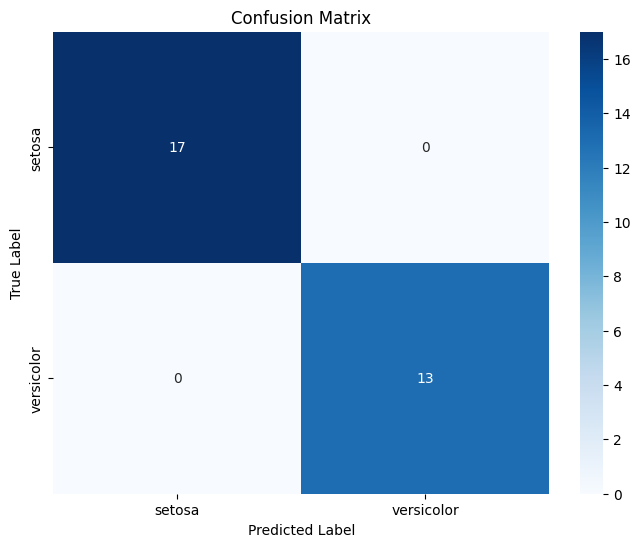

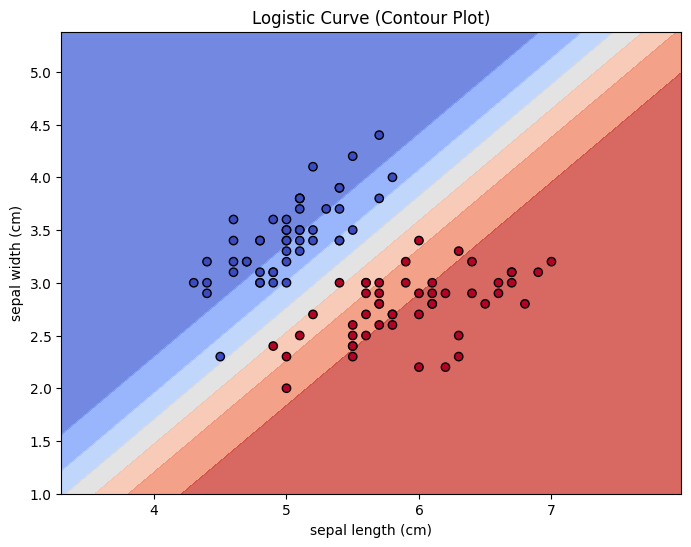

In [12]:

##3. Logistic Confusion
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Use only two classes (binary classification) and two features for visualization
X = iris.data[iris.target != 2, :2]  # Use first two features, exclude class 2
y = iris.target[iris.target != 2]    # Only class 0 and 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names[:2], yticklabels=iris.target_names[:2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot the logistic curve
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Get min/max for the second feature
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))  # Create a meshgrid

# Predict probabilities on the meshgrid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Probability for class 1
Z = Z.reshape(xx.shape)

# Plotting the logistic curve (contour plot)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)  # Contour plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')  # Scatter plot of data points
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])  # Use the second feature name
plt.title('Logistic Curve (Contour Plot)')
plt.show()

Number of clusters found: 3


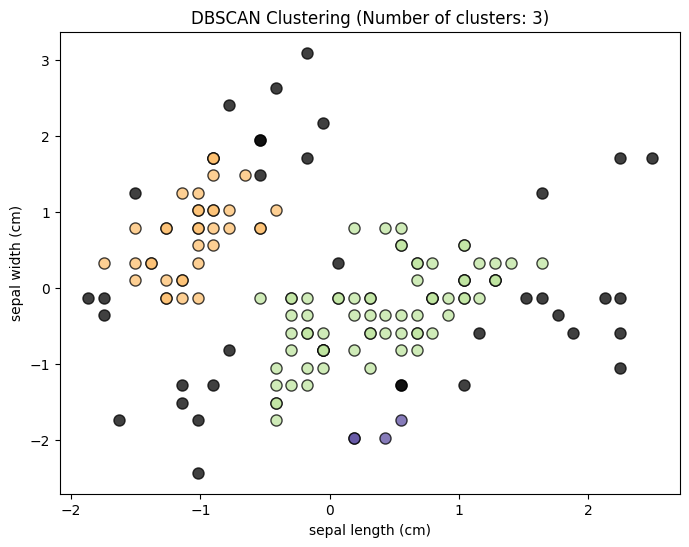

In [14]:
#4. DBSCAN
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Select the first two features for visualization purposes
X = iris.data[:, :2]

# Standardize the data for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN with tuned parameters
db = DBSCAN(eps=0.3, min_samples=4)  # Tuned parameters
labels = db.fit_predict(X_scaled)

# Identify unique clusters and noise points
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)  # Exclude noise
print(f"Number of clusters found: {n_clusters}")

# Plot the DBSCAN clustering results
plt.figure(figsize=(8, 6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise points
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X_scaled[class_member_mask]

    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col[:3]),
             markeredgecolor='k', markersize=8, alpha=0.75)

plt.title(f'DBSCAN Clustering (Number of clusters: {n_clusters})')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



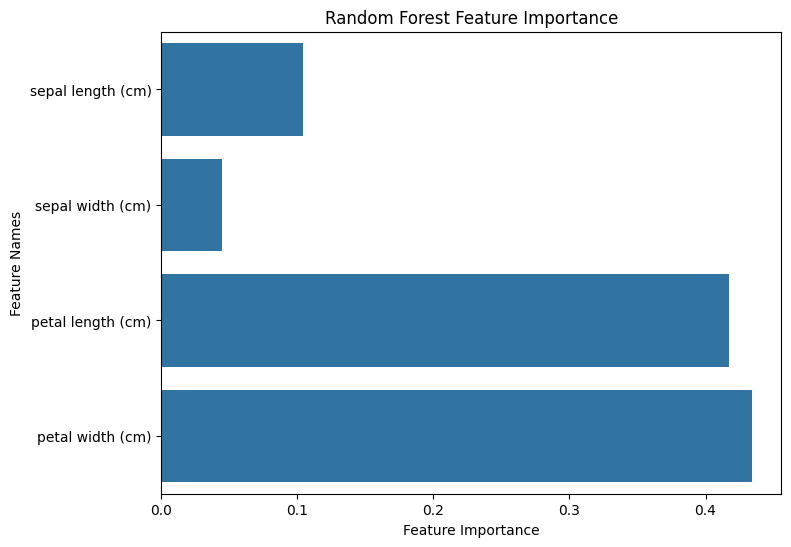

In [15]:
#5. Random Forest
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x=model.feature_importances_, y=iris.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Random Forest Feature Importance')
plt.show()


Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



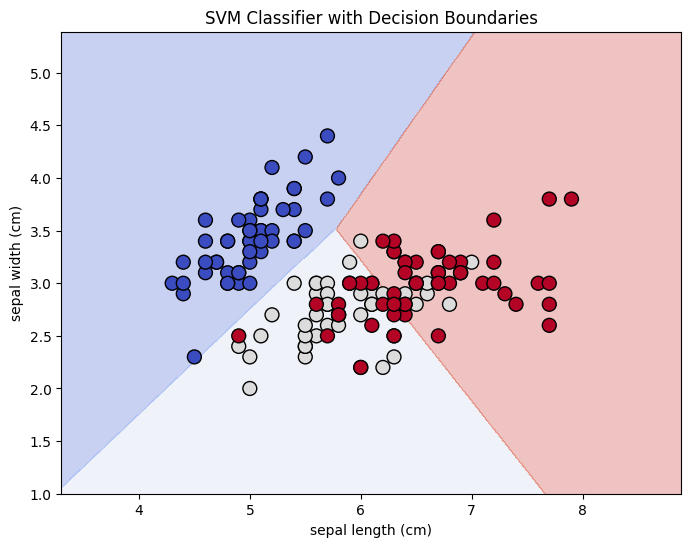

In [16]:
#6. SVM
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap='coolwarm')
plt.title('SVM Classifier with Decision Boundaries')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


Number of clusters found: 3


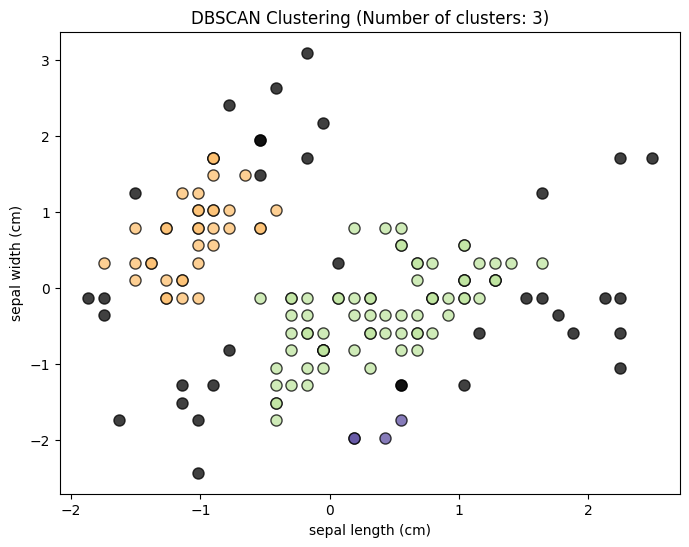

<ipython-input-80-61d64edc8993>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)


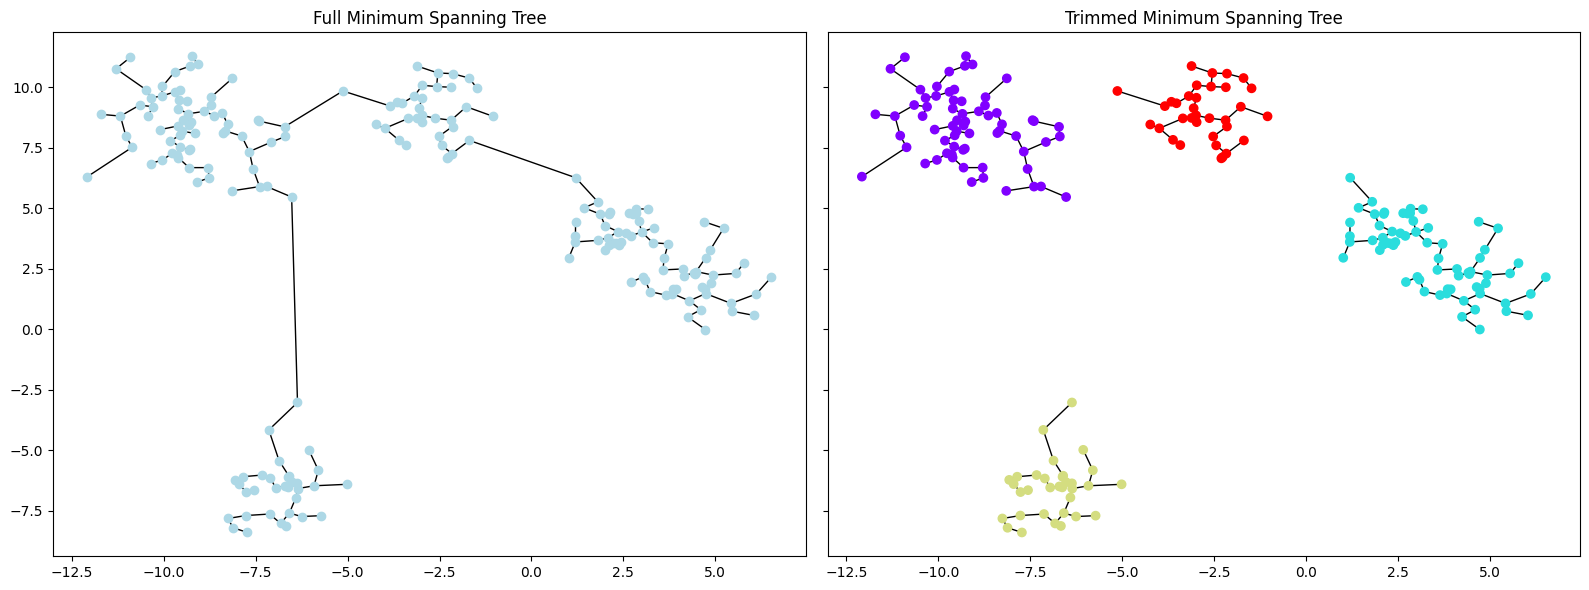

In [ ]:
##7. MST clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mst_clustering import MSTClustering

def plot_mst_clusters(X, model, figsize=(16, 6), cmap='rainbow'):
    """
    Plot MST clustering results showing both full and trimmed trees.

    Args:
        X: Input data array of shape (n_samples, 2)
        model: Fitted MSTClustering model
        figsize: Figure size tuple (width, height)
        cmap: Color map for cluster visualization
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharex=True, sharey=True)

    # Plot full and trimmed MST
    for ax, full_graph, colors in [(ax1, True, 'lightblue'),
                                 (ax2, False, model.labels_)]:
        segments = model.get_graph_segments(full_graph=full_graph)
        ax.plot(segments[0], segments[1], 'k-', lw=1, zorder=1)
        ax.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)
        ax.axis('tight')

    ax1.set_title('Full Minimum Spanning Tree', size=12)
    ax2.set_title('Trimmed Minimum Spanning Tree', size=12)
    plt.tight_layout()
    return fig

# Generate and cluster synthetic data
X, _ = make_blobs(n_samples=200, centers=6, random_state=42)
model = MSTClustering(cutoff_scale=2, approximate=False)
model.fit(X)

# Create visualization
plot_mst_clusters(X, model)
plt.show()

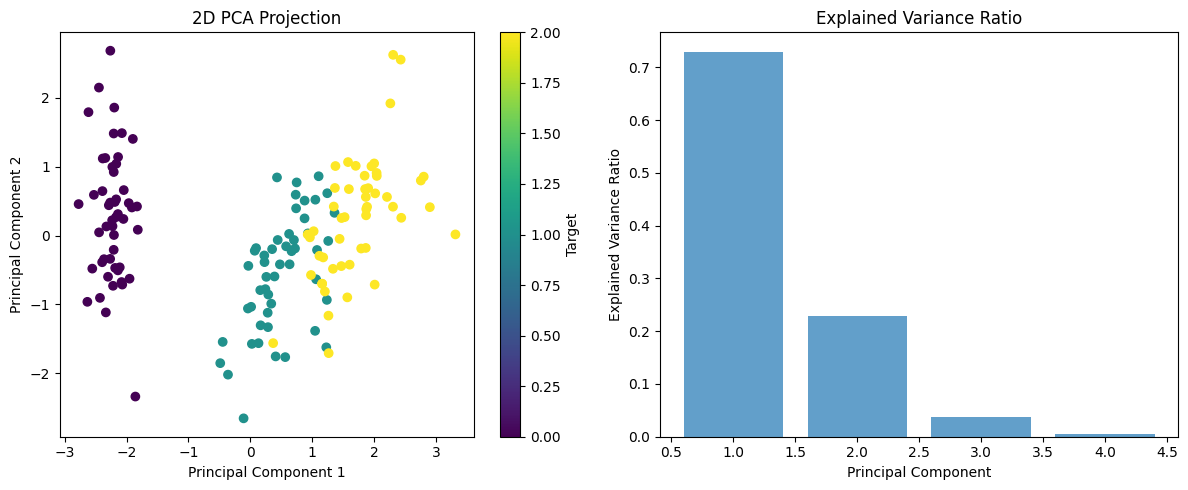

In [17]:
#PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)  # PCA with all components
X_pca = pca.fit_transform(X_scaled)

# Plot 2D projection
plt.figure(figsize=(12, 5))

# Scatter plot of first two principal components
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(scatter, label='Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')

# Bar chart of explained variance ratio
plt.subplot(1, 2, 2)
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.tight_layout()
plt.show()

